In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import gc
tf.config.run_functions_eagerly(True)

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

USE = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 1


In [4]:
import tensorflow as tf
import gc
import numpy as np

def USE_doc(documents, batch_size=256):
    embeddings = []
    num_docs = len(documents)

    for i in range(0, num_docs, batch_size):
        batch = documents[i : i + batch_size]

        try:
            batch_embeddings = USE(batch).numpy()  # Run on GPU
        except tf.errors.ResourceExhaustedError as e:
            print("❌ GPU memory exhausted. Restarting Colab may be needed.")
            break

        embeddings.append(batch_embeddings)

        # ✅ Free GPU memory after each batch
        tf.keras.backend.clear_session()  # Clears models & layers
        tf.compat.v1.reset_default_graph()  # ✅ Resets TensorFlow graph (forces cleanup)
        gc.collect()  # Python garbage collection

        print(f"✅ Processed {min(i + batch_size, num_docs)}/{num_docs} texts")

    return np.vstack(embeddings) if embeddings else None


In [5]:
df1 = pd.read_csv(r"/content/unresponded_comments_with_post_comment.csv")
df2 = pd.read_csv(r"/content/unresponded_comments_with_post_comment2.csv")

In [6]:
df1["label"] = -1
df2["label"] = -1

In [7]:
df1 = df1[['Post Title', 'Post Content', 'Comment', 'label']]
df1.columns

Index(['Post Title', 'Post Content', 'Comment', 'label'], dtype='object')

In [8]:
df2 = df2[['Post Title', 'Post Content', 'User Comment', 'label']]
df2.columns

Index(['Post Title', 'Post Content', 'User Comment', 'label'], dtype='object')

In [9]:
df1.dropna(inplace=True)
df2.dropna(inplace=True)
df1 = df1[~df1.eq("[deleted]").any(axis=1)]
df2 = df2[~df2.eq("[deleted]").any(axis=1)]

In [10]:
print(df1.columns)
print(df2.columns)

Index(['Post Title', 'Post Content', 'Comment', 'label'], dtype='object')
Index(['Post Title', 'Post Content', 'User Comment', 'label'], dtype='object')


In [ ]:
df1["Post Title Embedding"] = list(USE_doc(df1["Post Title"].tolist()))
df1["Post Content Embedding"] = list(USE_doc(df1["Post Content"].tolist()))
df1["Comment Embedding"] = list(USE_doc(df1["Comment"].tolist()))

In [ ]:
df1 = df1[["label", "Post Title Embedding", "Post Content Embedding", "Comment Embedding"]]
df1.head(3)

In [ ]:
df1.to_pickle("/content/df1_with_embeddings.pkl")
print("✅ df1 saved as Pickle file successfully!")

In [17]:
import tensorflow as tf
import gc

# Clear TensorFlow session
tf.keras.backend.clear_session()

# Force garbage collection
gc.collect()

print("✅ GPU memory cleared successfully!")


✅ GPU memory cleared successfully!


In [11]:
df2["Post Title Embedding"] = list(USE_doc(df2["Post Title"].tolist()))
df2["Post Content Embedding"] = list(USE_doc(df2["Post Content"].tolist()))
df2["Comment Embedding"] = list(USE_doc(df2["User Comment"].tolist()))

✅ Processed 256/259840 texts
✅ Processed 512/259840 texts
✅ Processed 768/259840 texts
✅ Processed 1024/259840 texts
✅ Processed 1280/259840 texts
✅ Processed 1536/259840 texts
✅ Processed 1792/259840 texts
✅ Processed 2048/259840 texts
✅ Processed 2304/259840 texts
✅ Processed 2560/259840 texts
✅ Processed 2816/259840 texts
✅ Processed 3072/259840 texts
✅ Processed 3328/259840 texts
✅ Processed 3584/259840 texts
✅ Processed 3840/259840 texts
✅ Processed 4096/259840 texts
✅ Processed 4352/259840 texts
✅ Processed 4608/259840 texts
✅ Processed 4864/259840 texts
✅ Processed 5120/259840 texts
✅ Processed 5376/259840 texts
✅ Processed 5632/259840 texts
✅ Processed 5888/259840 texts
✅ Processed 6144/259840 texts
✅ Processed 6400/259840 texts
✅ Processed 6656/259840 texts
✅ Processed 6912/259840 texts
✅ Processed 7168/259840 texts
✅ Processed 7424/259840 texts
✅ Processed 7680/259840 texts
✅ Processed 7936/259840 texts
✅ Processed 8192/259840 texts
✅ Processed 8448/259840 texts
✅ Processed 8

KeyboardInterrupt: 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import gc
tf.config.run_functions_eagerly(True)

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

USE = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd

In [54]:
# Encoding
input_dim = 1536
encoding_dim = 384

input_layer = Input(shape=(input_dim,)) #Layer 1
encoded = Dense(768, activation='relu')(input_layer)  #Layer 2
encoded = Dense(384, activation='relu')(encoded)  #Later 3

# Decoding
decoded = Dense(768, activation='relu')(encoded)
decoded = Dense(input_dim, activation='tanh')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 1536)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 768)                 │       1,180,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 384)                 │         295,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 768)                 │         295,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1536)                │       1,181,184 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,952,576 (11.26 MB)

 Trainable params: 2,952,576 (11.26 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
df1 = pd.read_pickle(r"/content/drive/MyDrive/df1_embeddings.pkl")
df2 = pd.read_pickle(r"/content/drive/MyDrive/df2_embeddings.pkl")

In [56]:
df1_sample = df1.sample(n=100000, random_state=1)
df2_sample = df2.sample(n=100000, random_state=1)
print(df1_sample.shape)
print(df2_sample.shape)

(100000, 4)
(100000, 4)


In [57]:
df1_sample["Post Title Embedding"] = df1_sample["Post Title Embedding"].apply(lambda x: np.array(x.strip("[]").split(), dtype=np.float32) if isinstance(x, str) else np.array(x, dtype=np.float32))

df1_sample["Post Content Embedding"] = df1_sample["Post Content Embedding"].apply(lambda x: np.array(x.strip("[]").split(), dtype=np.float32) if isinstance(x, str) else np.array(x, dtype=np.float32))

df1_sample["Commend Embedding"] = df1_sample["Commend Embedding"].apply(lambda x: np.array(x.strip("[]").split(), dtype=np.float32) if isinstance(x, str) else np.array(x, dtype=np.float32))

df2_sample["Post Title Embedding"] = df2_sample["Post Title Embedding"].apply(lambda x: np.array(x.strip("[]").split(), dtype=np.float32) if isinstance(x, str) else np.array(x, dtype=np.float32))

df2_sample["Post Content Embedding"] = df2_sample["Post Content Embedding"].apply(lambda x: np.array(x.strip("[]").split(), dtype=np.float32) if isinstance(x, str) else np.array(x, dtype=np.float32))

df2_sample["Commend Embedding"] = df2_sample["Commend Embedding"].apply(lambda x: np.array(x.strip("[]").split(), dtype=np.float32) if isinstance(x, str) else np.array(x, dtype=np.float32))


In [58]:
print("Post Title Embedding shape:", df1_sample["Post Title Embedding"].iloc[0].shape)
print("Post Content Embedding shape:", df1_sample["Post Content Embedding"].iloc[0].shape)
print("Commend Embedding shape:", df1_sample["Commend Embedding"].iloc[0].shape)

Post Title Embedding shape: (512,)
Post Content Embedding shape: (512,)
Commend Embedding shape: (512,)


In [59]:
# Convert each embedding column properly to a 2D NumPy array
d1_1 = np.stack(df1_sample["Post Title Embedding"].apply(np.array).to_numpy())
d1_2 = np.stack(df1_sample["Post Content Embedding"].apply(np.array).to_numpy())
d1_3 = np.stack(df1_sample["Commend Embedding"].apply(np.array).to_numpy())

d2_1 = np.stack(df2_sample["Post Title Embedding"].apply(np.array).to_numpy())
d2_2 = np.stack(df2_sample["Post Content Embedding"].apply(np.array).to_numpy())
d2_3 = np.stack(df2_sample["Commend Embedding"].apply(np.array).to_numpy())


X1 = np.ascontiguousarray(np.concatenate([d1_1, d1_2, d1_3], axis=1), dtype=np.float32)
X2 = np.ascontiguousarray(np.concatenate([d2_1, d2_2, d2_3], axis=1), dtype=np.float32)
X = np.ascontiguousarray(np.vstack((X1, X2)), dtype=np.float32)

In [60]:
print("X dtype:", X.dtype)  # Should be float32 or float64


X dtype: float32


In [61]:
print("Number of NaN values in X:", np.isnan(X).sum())

Number of NaN values in X: 0


In [62]:
import numpy as np

none_values = np.sum([x is None for x in X.flatten()])
print(f"🚨 Total None values in X: {none_values}")

🚨 Total None values in X: 0


In [63]:
X_tensor = tf.convert_to_tensor(X, dtype=tf.float32)

In [64]:
from sklearn.model_selection import train_test_split

# Convert tensor back to NumPy before splitting
X_train, X_temp = train_test_split(X_tensor.numpy(), test_size=0.2, random_state=1)

X_val, X_test = train_test_split(X_temp, test_size=0.5, random_state=1)

autoencoder.fit(X_train, X_train, epochs=5, batch_size=64, shuffle=True, validation_data=(X_val, X_val))

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 140s 56ms/step - loss: 8.0378e-04 - val_loss: 4.0911e-04
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 139s 56ms/step - loss: 3.9424e-04 - val_loss: 3.6033e-04
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 139s 55ms/step - loss: 3.5506e-04 - val_loss: 3.3741e-04
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 139s 56ms/step - loss: 3.3298e-04 - val_loss: 3.1968e-04
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 139s 56ms/step - loss: 3.1868e-04 - val_loss: 3.1340e-04


In [65]:
encoder = Model(autoencoder.input, autoencoder.layers[-3].output)

encoded_features = encoder.predict(X_train)
print("✅ Encoded features shape:", encoded_features.shape)

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step
✅ Encoded features shape: (160000, 384)


In [66]:
np.save("/content/encoded_features.npy", encoded_features)
print("✅ Encoded features saved as .npy file!")

✅ Encoded features saved as .npy file!


In [67]:
encoder.save("/content/encoder_model.h5")
print("✅ Encoder model saved successfully!")

✅ Encoder model saved successfully!


In [68]:
from sklearn.metrics import mean_squared_error

X_test_reconstructed = autoencoder.predict(X_test)

mse_test_per_sample = np.mean(np.square(X_test - X_test_reconstructed), axis=1)

mse_test_total = np.mean(mse_test_per_sample)

print(f"✅ MSE per test sample shape: {mse_test_per_sample.shape}")
print(f"🚀 Autoencoder Test MSE: {mse_test_total}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step
✅ MSE per test sample shape: (20000,)
🚀 Autoencoder Test MSE: 0.0003115379950031638


In [69]:
X_train_reconstructed = autoencoder.predict(X_train)

mse_train_per_sample = np.mean(np.square(X_train - X_train_reconstructed), axis=1)

mse_train_total = np.mean(mse_train_per_sample)

print(f"✅ MSE per training sample shape: {mse_train_per_sample.shape}")  # Expected: (number of training samples,)
print(f"🚀 Autoencoder Training MSE: {mse_train_total}")

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 28s 6ms/step
✅ MSE per training sample shape: (160000,)
🚀 Autoencoder Training MSE: 0.00031234396738000214


In [70]:
from sklearn.metrics import mean_squared_error

X_val_reconstructed = autoencoder.predict(X_val)

mse_val_per_sample = np.mean(np.square(X_val - X_val_reconstructed), axis=1)

mse_val_total = np.mean(mse_val_per_sample)

print(f"✅ MSE per validation sample shape: {mse_val_per_sample.shape}")  # Expected: (number of validation samples,)
print(f"🚀 Autoencoder Validation MSE: {mse_val_total}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
✅ MSE per validation sample shape: (20000,)
🚀 Autoencoder Validation MSE: 0.00031339723500423133


In [71]:
print(f"🚀 Unique samples in training set: {len(np.unique(X_train, axis=0))}")
print(f"🚀 Unique samples in validation set: {len(np.unique(X_val, axis=0))}")
print(f"🚀 Unique samples in test set: {len(np.unique(X_test, axis=0))}")

🚀 Unique samples in training set: 71062
🚀 Unique samples in validation set: 12442
🚀 Unique samples in test set: 12410


In [72]:
diff_train = np.abs(X_train - X_train_reconstructed)
diff_val = np.abs(X_val - X_val_reconstructed)
diff_test = np.abs(X_test - X_test_reconstructed)

print(f"🚀 Max Train Reconstruction Difference: {np.max(diff_train)}")
print(f"🚀 Min Train Reconstruction Difference: {np.min(diff_train)}\n")

print(f"🚀 Max Validation Reconstruction Difference: {np.max(diff_val)}")
print(f"🚀 Min Validation Reconstruction Difference: {np.min(diff_val)}\n")

print(f"🚀 Max Test Reconstruction Difference: {np.max(diff_test)}")
print(f"🚀 Min Test Reconstruction Difference: {np.min(diff_test)}")

🚀 Max Train Reconstruction Difference: 0.17208677530288696
🚀 Min Train Reconstruction Difference: 0.0

🚀 Max Validation Reconstruction Difference: 0.17309826612472534
🚀 Min Validation Reconstruction Difference: 0.0

🚀 Max Test Reconstruction Difference: 0.1552356630563736
🚀 Min Test Reconstruction Difference: 0.0


In [73]:
print(f"🚀 Training MSE: {mse_train_total:.10f}")
print(f"🚀 Validation MSE: {mse_val_total:.10f}")
print(f"🚀 Test MSE: {mse_test_total:.10f}")

🚀 Training MSE: 0.0003123440
🚀 Validation MSE: 0.0003133972
🚀 Test MSE: 0.0003115380


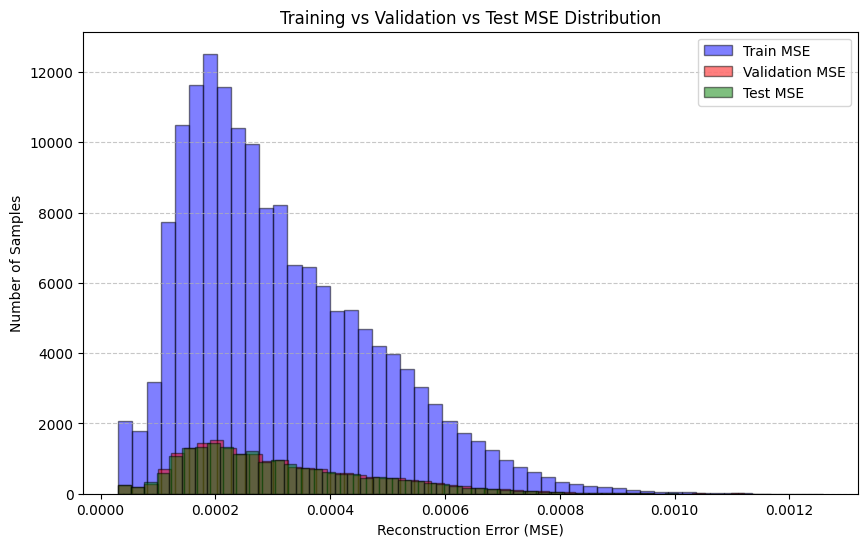

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(mse_train_per_sample, bins=50, alpha=0.5, label="Train MSE", color="blue", edgecolor="black")
plt.hist(mse_val_per_sample, bins=50, alpha=0.5, label="Validation MSE", color="red", edgecolor="black")
plt.hist(mse_test_per_sample, bins=50, alpha=0.5, label="Test MSE", color="green", edgecolor="black")
plt.xlabel("Reconstruction Error (MSE)")
plt.ylabel("Number of Samples")
plt.title("Training vs Validation vs Test MSE Distribution")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


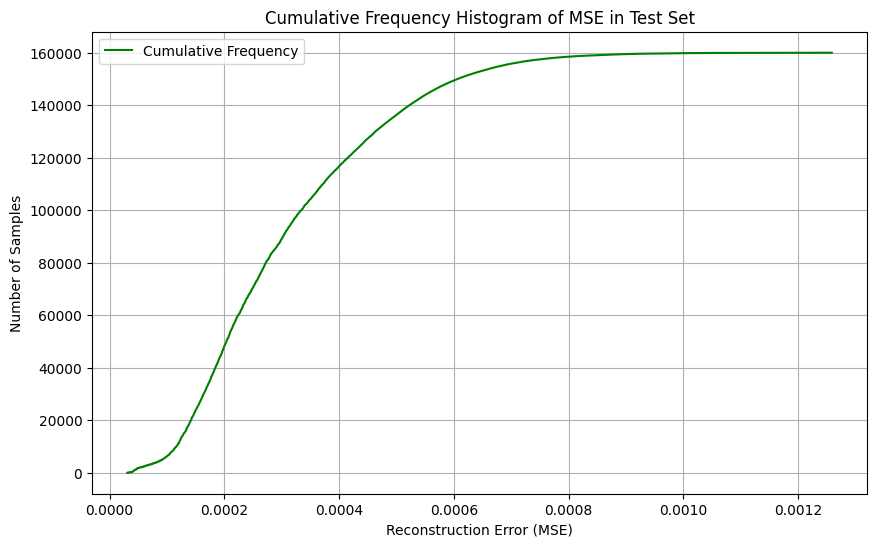

In [86]:
sorted_mse = np.sort(mse_train_per_sample)
cumulative_freq = np.arange(1, len(sorted_mse) + 1)

plt.figure(figsize=(10, 6))
plt.plot(sorted_mse, cumulative_freq, linestyle='-', color='green', label="Cumulative Frequency")

plt.xlabel("Reconstruction Error (MSE)")
plt.ylabel("Number of Samples")
plt.title("Cumulative Frequency Histogram of MSE in Test Set")
plt.grid(True)
plt.legend()

# Save the plot
plt.savefig("/content/cumulative_mse_histogram.png")

# Show the plot
plt.show()